# Reddit API Project
## Sonyah Seiden

### Executive Summary:
This project aims to take an initial look at user interaction on Reddit. Our goals included scraping data from Reddit's API, developing a binary classification, and building predictive models that facilitate our undertanding of important attributes.  

The first goal was accomplished in the *Cleaning and Extracting notebook*
The second and third goals are accomplished here and in the *Random Forest Model* notebook

#### The key takeaways are:
- Subreddit and number of subscribers is highly impactful
- As are factors like being stickied or locked on a subreddit
- Crossposted threads do well to achieve higher interaction
- We can identify certain words, topics, and ideas that are popular for gaining interaction, but what, specifically, those words are, is highly dependent on immediate relevance (i.e. buzz-topics naturally generate more...buzz)

#### Notebook Contents
- [Attribute selection](#attribute selection)
- [Class development with K-Means](#class development)
- [Feature engineering](#feature engineering)
- [Text content analysis](#impactful words)
- [Subreddit analysis](#impactful subreddits)
- [Total inclusion model](#complete model)

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### In addition to the required attributes:
- Title of thread
- Subreddit
- Lenght of time up
- Number of comments (yi)
#### I'm going to pull out a number of other attributes that I'd like to test, including:
- Number of subscribers
- Scores (ups, downs, gilds, net score)
- Over 18
- Moderator changes (pinned, locked, archived, stickied)
- Crossposts (a popular approach to get more likes and comments)
- Post categories (this may not be fruitful)
- Is video
- a few others

In [65]:
#Creating a data dictionary that I fill as I identify attributes I want in the dataset
#Includes notes
dictionary = pd.DataFrame()
dictionary['variable'] = ['comments',
                          'title',
                          'subreddit',
                          'subreddit_subscribers',
                          'subreddit_type',
                          'ups',
                          'downs',
                          'score',
                          'gilded',
                          'time_since_posted',
                          'over_18',
                          'distinguished',
                          'stickied',
                          'locked',
                          'num_crossposts',
                          'is_video',
                         ]

dictionary['description'] = ['Number of comments. Target variable',
                          'Title of post. Apply vectorizer',
                          'subreddit name (Consider lemmatizer)',
                          'Number of subreddit subscribers',
                          'public v. private',
                          'Number of uplikes',
                          'Number of downlikes',
                          'Net score(ups + downs)',
                          'Number of times post is gilded',
                          'Calculated as current_time - time_posted',
                          'If post is 18+',
                          'distinguished',
                          'If post is stickied in post',
                          'If post is locked in post',
                          'Times has been crossposted to other threads',
                          'If post contains video media',
                         ]

dictionary['dtype'] = ['str',
                          'str',
                          'subreddit',
                          'int',
                          'category',
                          'int',
                          'int',
                          'int',
                          'int',
                          'long',
                          'bool',
                          'bool',
                          'bool',
                          'bool',
                          'int',
                          'bool',

                         ]

In [66]:
def what_is(dataset, variable):
    """
    Works on all standard Sonyah Seiden data dictionaries.
    dataset = dataframe used to house data dictionary
    variable = attribute information is needed on, formatted as string """
    return dataset[dataset['variable']==variable]
#Creating a function to be able to call the information 

In [67]:
dataset = pd.read_csv('./unique_posts.csv'); #reading in my csv

In [68]:
dataset.shape

(18018, 85)

In [69]:
dataset.columns; #used this as reference, muting output to shorten notebook

##### _Thanks to the way I saved my data, I can read it in and easily pull information out._

<a id='attribute selection'></a>

In [70]:
Xi= pd.DataFrame()
Xi['comments'] = dataset['num_comments']
Xi['title'] = dataset['title']
Xi['subreddit'] = dataset['subreddit']
Xi['subreddit_subscribers'] = dataset['subreddit_subscribers'] 
Xi['subreddit_type'] = dataset['subreddit_type']
Xi['ups'] = dataset['ups']
Xi['downs'] = dataset['downs']
Xi['score'] = dataset['score']
Xi['gilded'] = dataset['gilded']
Xi['time_since_posted'] = (1527429342827.872-(dataset['created'])) #time pulled above
Xi['over_18'] = dataset['over_18']
Xi['distinguished'] = dataset['distinguished']
Xi['stickied'] = dataset['stickied']
Xi['locked'] = dataset['locked']
Xi['num_crossposts'] = dataset['num_crossposts']
Xi['is_video'] = dataset['is_video']

In [71]:
Xi.to_csv('./Xi.csv')
#Saving to csv because paranoia

### We've gotten our data in properly, but our output needs to be binary. Let's take a look at our yi and test a few ways to develop a threshold

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


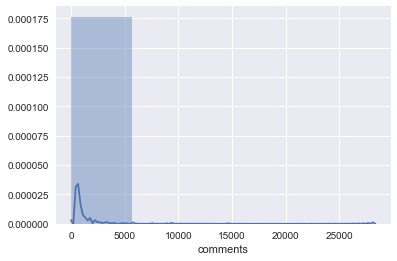

In [72]:
import seaborn as sns
sns.distplot(Xi['comments'], bins=5);

##### _There is such a large spread that we really need to break down our yi into a subset. Since we seem to have a dropoff somewhere under 5,000 let's extract those with less than 5,000 comments and save it to an object

In [73]:
subset = Xi[Xi['comments']<5000]

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


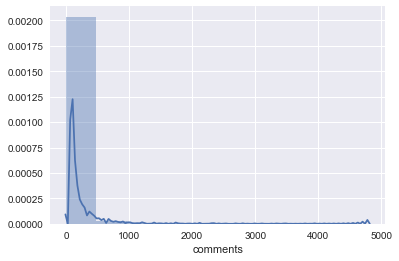

In [74]:
sns.distplot(subset['comments'],
            bins=10);

#### Let's try one more subset to get a little more specific.

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


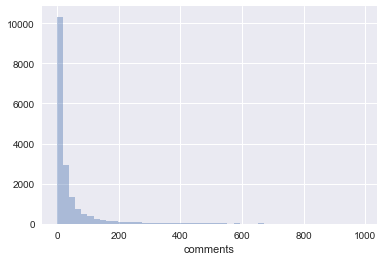

In [75]:
subset_2 = Xi[Xi['comments']< 1000]
sns.distplot(subset_2['comments'],
            kde=False);

<a id='class development'></a>

### So clearly we have a view groups that can be separated. Let's use K-Means unsupervised model to separate them more "intelligently"
#### We're going to do square root of Xi because it had the best impact on our variance

In [76]:
#Creating a Yi that will be put into my K-Means method
Yi = np.sqrt(Xi[[
    'comments'
]])

X = Xi.drop(labels=['score','gilded','ups','downs'], axis=1)
#creating a new X dataframe

### Train Test Split

### Target Development: Classification Split Trials
- Tried different variations of comments, score, and gilds
- Tried StandardScaler and no scaler

_Best result was to do K-Means of K=2 with sqrt(comments) (visualized below)_

#### Visualizing the _correction of comments distribution_

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


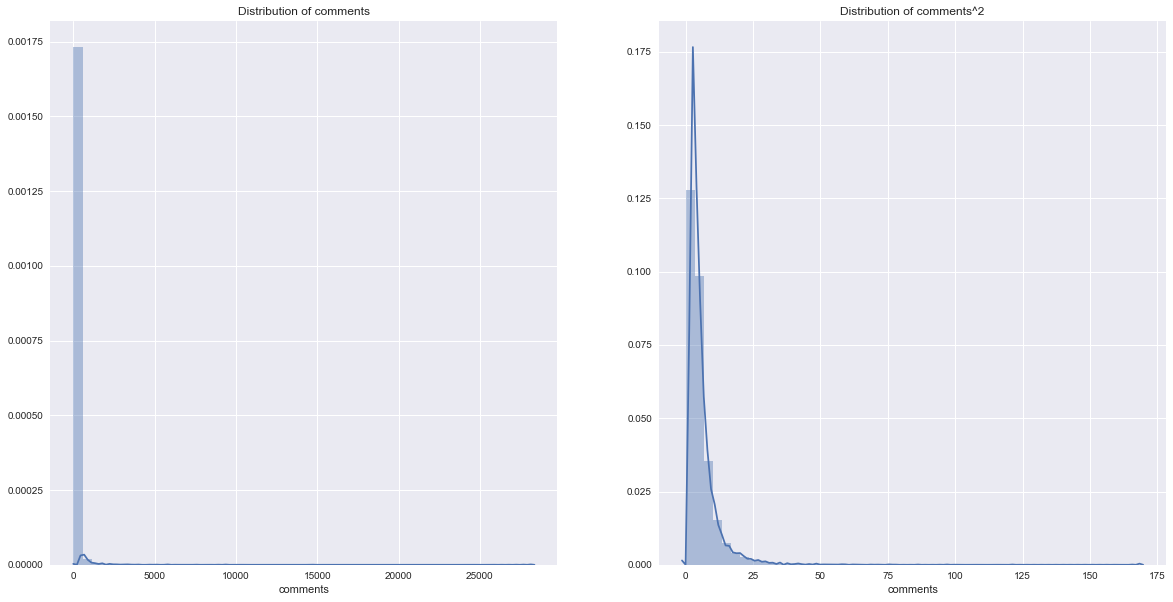

In [77]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(Xi['comments'],
            ax=ax1);
ax1.set_title('Distribution of comments');
sns.distplot(np.sqrt(Xi['comments']),
            ax=ax2);
ax2.set_title('Distribution of comments^2');

##### Although this might not seem significant, the full effect occurs when it is passed through K-Means. It allows us to get tighter groups with a wider distance between the means.

#### Visualizing the _issues of splitting by mean_

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


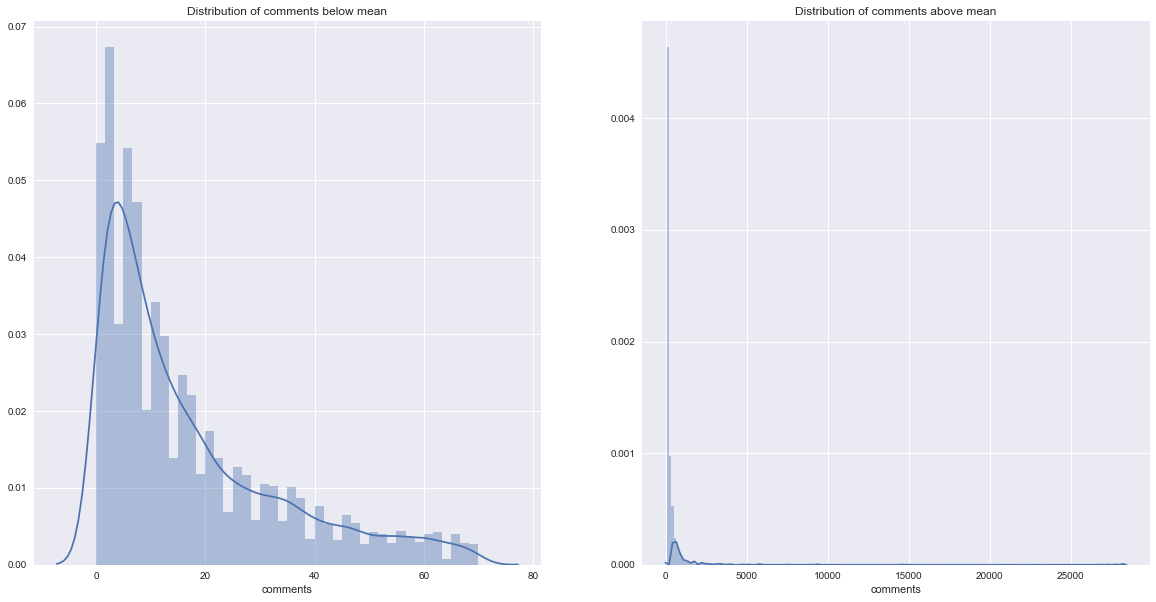

In [78]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot((Xi[Xi['comments']<Xi['comments'].mean()]['comments']),
            ax=ax1);
ax1.set_title('Distribution of comments below mean');
sns.distplot((Xi[Xi['comments']>Xi['comments'].mean()]['comments']),
             bins=200,
            ax=ax2);
ax2.set_title('Distribution of comments above mean');

#### While this does well to pull out and separate the tiny bump in our model, it is still not leaving us with a good distribution of our target class. We have, instead, created two distinct spikes on the low end of our scale and are thus *unable to be sure our model will do well to understand attributes of high-interaction posts*.   This is reflected below in the spreads of our two classes.

In [79]:
print('comments below mean', '\ncomments min:', Xi[Xi['comments']<Xi['comments'].mean()]['comments'].min(), 'comments max:', Xi[Xi['comments']<Xi['comments'].mean()]['comments'].max(),
      '\nscore min:',Xi[Xi['comments']<Xi['comments'].mean()]['score'].min(), 'score max:', Xi[Xi['comments']<Xi['comments'].mean()]['score'].max(),
     '\ngilded min:', Xi[Xi['comments']<Xi['comments'].mean()]['gilded'].min(), 'gilded max', Xi[Xi['comments']<Xi['comments'].mean()]['gilded'].max()
     )

comments below mean 
comments min: 0 comments max: 70 
score min: 16 score max: 20264 
gilded min: 0 gilded max 2


In [80]:
print('comments above mean', '\ncomments min:', Xi[Xi['comments']>Xi['comments'].mean()]['comments'].min(), 'comments max:', Xi[Xi['comments']>Xi['comments'].mean()]['comments'].max(),
      '\nscore min:',Xi[Xi['comments']>Xi['comments'].mean()]['score'].min(), 'score max:', Xi[Xi['comments']>Xi['comments'].mean()]['score'].max(),
     '\ngilded min:', Xi[Xi['comments']>Xi['comments'].mean()]['gilded'].min(), 'gilded max', Xi[Xi['comments']>Xi['comments'].mean()]['gilded'].max()
     )

comments above mean 
comments min: 71 comments max: 28345 
score min: 22 score max: 100823 
gilded min: 0 gilded max 5


#### Visualizing the impact of using `K-Means` to generate our target.
###### This is a good way to create a split that still operates using means, but incorporates multiple means and relies on optimizing distance between them. Using this methodology incombination with sgrt(comments) has the best overall impact, and allows the distribution within each class to be closer to normal.

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
#X is our dataframe of attributes
#Yi is our target
trainX, testX, trainY, testY = train_test_split(X, Yi,
                                               random_state=1994,
                                                test_size=0.3,
                                                shuffle=True)

In [83]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [84]:
# ss = StandardScaler()
# ss.fit(trainY)
# Y_train = ss.transform(trainY)
# Y_test = ss.transform(testY)
# Commented out because this does not improve my cluster

In [85]:
kmeans = KMeans(n_clusters = 2, #2 clusters for binary output
               random_state = 1994,
               )
target_train = kmeans.fit_predict(trainY)
target_test = kmeans.predict(testY)
Xi['target'] = kmeans.predict(Yi)

In [86]:
list(zip(kmeans.cluster_centers_.T, Yi.columns))

[(array([ 4.30142428, 22.19539655]), 'comments')]

/anaconda3/envs/dsi/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


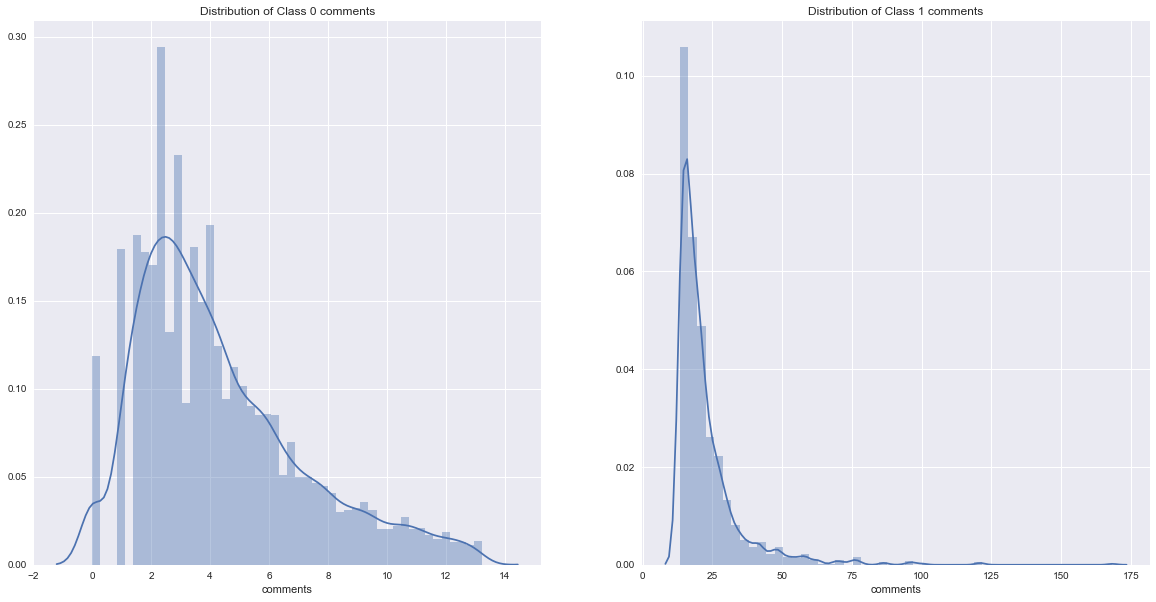

In [87]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
sns.distplot(np.sqrt(Xi[Xi['target']==1]['comments']),
            ax=ax2);
ax2.set_title('Distribution of Class 1 comments');
sns.distplot(np.sqrt(Xi[Xi['target']==0]['comments']),
            ax=ax1);
ax1.set_title('Distribution of Class 0 comments');


In [88]:
Xi['target'].sum()

1221

In [89]:
print('class 0', '\ncomments min:', Xi[Xi['target']==1]['comments'].min(), 'comments max:', Xi[Xi['target']==1]['comments'].max(),
      '\nscore min:',Xi[Xi['target']==1]['score'].min(), 'score max:', Xi[Xi['target']==1]['score'].max(),
     '\ngilded min:', Xi[Xi['target']==1]['gilded'].min(), 'gilded max', Xi[Xi['target']==1]['gilded'].max()
     )

class 0 
comments min: 176 comments max: 28345 
score min: 57 score max: 100823 
gilded min: 0 gilded max 5


In [90]:
print('class 1', '\ncomments min:', Xi[Xi['target']==0]['comments'].min(), 'comments max:', Xi[Xi['target']==0]['comments'].max(),
      '\nscore min:',Xi[Xi['target']==0]['score'].min(), 'score max:', Xi[Xi['target']==0]['score'].max(),
     '\ngilded min:', Xi[Xi['target']==0]['gilded'].min(), 'gilded max', Xi[Xi['target']==0]['gilded'].max()
     )

class 1 
comments min: 0 comments max: 175 
score min: 16 score max: 33748 
gilded min: 0 gilded max 2


In [91]:
Xi['comments'].median()

15.0

In [92]:
len(Xi[Xi['target']==0]),len(Xi[Xi['target']==1])

(16797, 1221)

In [93]:
print(len(Xi[Xi['target']==1])/(len(Xi)))

0.06776556776556776


In [94]:
print('our baseline for assessment is:', 1-(len(Xi[Xi['target']==1])/(len(Xi))))

our baseline for assessment is: 0.9322344322344323


<a id='feature engineering'></a>

### Cleaning & Feature Engineering
#### `CountVectorizer` on `title` column

In [95]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [96]:
counts = CountVectorizer(lowercase=True,
                      stop_words = 'english',
                      ngram_range=(1,3)
                      )

In [97]:
counts.fit(trainX['title'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 3), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [98]:
words_train = counts.transform(trainX['title'])
words_test = counts.transform(testX['title'])

In [99]:
words_train = words_train.todense()
words_test = words_test.todense()

#### Gonna make a simple model to see how well a model does based off text content alone.

In [100]:
lr = LogisticRegression()
lr.fit(words_train, target_train)
lr.score(words_test, target_test)

0.9358120606733259

In [101]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, lr.predict(words_test))

In [102]:
cm

array([[4968,   43],
       [ 304,   91]])

In [104]:
print('The false positive rate was: ', 43/(4968+43),
     '\nThe false negative rate was: ', 304/(304+91))

The false positive rate was:  0.008581121532628218 
The false negative rate was:  0.769620253164557


##### Daaamn this model not bad, but most of our explanation loss is occuring from our 'success' class, which is not good.

### Output Improvement
#### Resampling
##### Given the small percentage of our minority class, I know I am going to want to use `resample` as a method to improve my training dataset. I tried: 
- upsampling the minority class (made my model worse)
- downsampling the majority class (a few different tries and I ended up going with reducing the majority class to 4500)
##### and run the adapted datasets through `CountVectorizer` and then `LogisticRegression`

In [105]:
maj_class = trainX[trainX['comments']<176]
min_class = trainX[trainX['comments']>175]
#setting majority and minority
#Our comments minimum for the majority class was 176 so I am using that as my separator
#I'll run this back through K-Means after resampling

In [106]:
len(maj_class), len(min_class)

(11786, 826)

In [107]:
from sklearn.utils import resample

bootsy = resample(maj_class, replace=False, n_samples=4500, random_state=42)
dataset_boots = pd.concat([bootsy, min_class],axis=0)

In [108]:
1-(len(bootsy))/len(dataset_boots)

0.15508824633871576

In [109]:
print('Our new baseline is: ', (len(bootsy))/len(dataset_boots))

Our new baseline is:  0.8449117536612842


### Yi development
#### `KMeans Cluster` pt. II

In [110]:
cluster_boots = np.sqrt(dataset_boots['comments'])

In [111]:
kmeans = KMeans(n_clusters = 2, #2 clusters for binary output
               random_state = 1994
               )
target_train = kmeans.fit_predict(cluster_boots.values.reshape(-1, 1))
target_test = kmeans.predict(testY)

### Feature Engineering
#### Using `CountVectorizer` on `title` column pt.II
##### That way we can redo the first model and see if bootstrapping changed it at all.

In [112]:
counts = CountVectorizer(lowercase=True,
                      stop_words = 'english',
                      ngram_range=(1,3)
                      )
words_train = counts.fit_transform(dataset_boots['title'].values.astype('U'))
#got this bit of code from StackOverflow, fixed an odd ValueError I was getting

words_train = words_train.todense()
#words_test is the test set component

In [113]:
words_test = counts.transform(testX['title'].values.astype('U'))
words_test = words_test.todense()

In [114]:
train_title_cvec = pd.DataFrame(data=words_train,
                   columns=counts.get_feature_names())
test_title_cvec = pd.DataFrame(data=words_test,
                              columns=counts.get_feature_names())

In [115]:
lr_resampled = LogisticRegression()
lr_resampled.fit(words_train, target_train)
lr_resampled.score(words_test, target_test)

0.9413614502404736

In [116]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, lr_resampled.predict(words_test))

In [117]:
cm

array([[4949,   62],
       [ 255,  140]])

In [118]:
print('The false positive rate was: ', 62/(4949+62),
     '\nThe false negative rate was: ', 255/(255+140))

The false positive rate was:  0.01237277988425464 
The false negative rate was:  0.6455696202531646


#### Overall, we have less explanation loss and we have been able to reduce our false negative rate by 0.1

#### Despite this, I'm still going to use this model to look at impactful words.
##### We'll do that using `np.exp(coefficients)`

In [55]:
exp_coeffs = pd.concat([pd.Series(train_title_cvec.columns),
                       pd.DataFrame(np.exp(lr_resampled.coef_)).T],
                     axis=1,
                     keys=['attributes', 'exp_coeff'])

exp_coeffs.sort_values([('exp_coeff', 0)], ascending=False, inplace=True)

<a id='impactful words'></a>

In [56]:
exp_coeffs[0:75]

,attributes,exp_coeff
,0,0
10775,disgusting,5.762925
12602,epilogue,4.371521
28749,pigtails,4.371521
39984,tweet,3.985257
6376,car,3.811252
22616,lol,3.299299
27002,office today,3.132402
24355,men raped,3.081926
40794,utc right,2.976530


#### Disturbing results...I am going to use `CountVectorizer` again only my 'success' class and see if we can dig deeper.

In [57]:
successful_words_train = counts.fit_transform(Xi[Xi['target']==1]['title'].values.astype('U'))
#got this bit of code from StackOverflow, fixed an odd ValueError I was getting
successful_words_train = successful_words_train.todense()

In [58]:
Xi['target'].value_counts()

0    16797
1     1221
Name: target, dtype: int64

In [59]:
successful_words = pd.DataFrame(data=successful_words_train,
                   columns=counts.get_feature_names())

In [60]:
successful_words.sum().sort_values(ascending=False)[0:25]

new         54
just        36
like        34
roseanne    33
today       31
people      27
man         26
old         25
know        25
til         24
abc         24
2018        23
game        23
don         23
guy         23
world       22
car         22
woman       22
racist      22
barr        21
says        20
11          19
right       19
thing       19
really      18
dtype: int64

##### That's definitely an improvement from our baseline, and even from our last model.
#### Now that we've have resampled, let's clean the rest of our attributes so we can add them to our model.

### Cleaning
#### Using `LabelBinarizer` on booleans & categoricals

In [61]:
from sklearn.preprocessing import LabelBinarizer
import scipy

In [62]:
bools = ['subreddit_type','over_18','distinguished',
         'stickied','locked','is_video']
#made a list of columns referencing .dtypes output above

for column in dataset_boots[bools]:
    print(dataset_boots[column].value_counts())
    #checking each column's categories and distributions
    #I eliminated some attributes using this

public        5305
restricted      21
Name: subreddit_type, dtype: int64
False    5272
True       54
Name: over_18, dtype: int64
moderator    18
Name: distinguished, dtype: int64
False    5281
True       45
Name: stickied, dtype: int64
False    5312
True       14
Name: locked, dtype: int64
False    5126
True      200
Name: is_video, dtype: int64


In [122]:
#The moderator column looks funky. I'm going to fix it manually before running the binarizer

dataset_boots['distinguished'].fillna(value=0, inplace=True)
#correcting the NaNs for 0's to signify non-moderator

dataset_boots['distinguished'].replace('moderator', 1, inplace=True)
#filling in 1's for moderator status

In [123]:
dataset_boots[bools].isnull().sum()

subreddit_type    0
over_18           0
distinguished     0
stickied          0
locked            0
is_video          0
dtype: int64

In [124]:
lb = LabelBinarizer()

for column in dataset_boots[bools]:
    print(column)
    try:
        lb.fit(dataset_boots[column])
        dataset_boots[column] = lb.transform(dataset_boots[column])
    except ValueError:
        print(column+' needs cleaning!')
        
    #putting my LabelBinarizer into a for loop to run column by column and alert me if something doesn't binarize properly
    #I solved a few bugs with this

subreddit_type
over_18
distinguished
stickied
locked
is_video


In [125]:
for column in testX[bools]:
    print(column)
    try:
        testX[column] = lb.transform(testX[column])
    except ValueError:
        print(column+' needs cleaning!')

subreddit_type
over_18
distinguished
distinguished needs cleaning!
stickied
locked
is_video


/anaconda3/envs/dsi/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [126]:
testX['distinguished'].fillna(value=0, inplace=True)
#correcting the NaNs for 0's to signify non-moderator

testX['distinguished'].replace('moderator', 1, inplace=True)
#filling in 1's for moderator status

/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/anaconda3/envs/dsi/lib/python3.6/site-packages/pandas/core/generic.py:4619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [127]:
testX.head()

,comments,title,subreddit,subreddit_subscribers,subreddit_type,time_since_posted,over_18,distinguished,stickied,locked,num_crossposts,is_video
1897,19,My humble commuter,FixedGearBicycle,35273,0,1.525902e+12,0,0,0,0,0,0
1985,6,mew_irl,mew_irl,4973,0,1.525902e+12,0,0,0,0,0,0
3983,26,furry🎸irl,furry_irl,33232,0,1.525902e+12,0,0,0,0,0,0
7471,46,"This Rabbit always brings joy in the mornings,...",Rabbits,66675,0,1.525902e+12,0,0,0,0,0,1
13289,715,TIL that during the filming for The Order of t...,todayilearned,18831601,0,1.525902e+12,0,0,0,0,1,0


In [128]:
for column in dataset_boots[bools]:
    print(dataset_boots[column].value_counts())

0    5305
1      21
Name: subreddit_type, dtype: int64
0    5272
1      54
Name: over_18, dtype: int64
0    5308
1      18
Name: distinguished, dtype: int64
0    5281
1      45
Name: stickied, dtype: int64
0    5312
1      14
Name: locked, dtype: int64
0    5126
1     200
Name: is_video, dtype: int64


In [129]:
#Quickly making another dictionary to house interpretations of booleans
booleans = pd.DataFrame()
booleans['attribute'] = ['subreddit_type',
                         'over_18',
                         'distinguished',
                         'stickied',
                         'locked',
                         'is_video'
                         ]

booleans['0'] = ['public',
                   'no',
                   'not a moderator',
                   'no',
                   'no',
                   'no']

booleans['1'] = ['restricted',
                 'yes',
                 'moderator',
                 'yes',
                 'yes',
                 'yes']

### Cleaning
#### Using `CountVectorizer` on `subreddit` to create dummies

### Model 3
#### `CVEC` output for `subreddit`

In [130]:
cvec_subreddit = CountVectorizer(lowercase=True)
cvec_subreddit.fit(dataset_boots['subreddit'])
train_subreddit_dummies = cvec_subreddit.transform(dataset_boots['subreddit'])
test_subreddit_dummies = cvec_subreddit.transform(testX['subreddit'])

###### Quickly going to save all my attributes back together

In [131]:
trainX_boots = scipy.sparse.hstack([scipy.sparse.csr_matrix(dataset_boots[bools]),
                                    dataset_boots[['subreddit_subscribers',
                                    'time_since_posted']],
                                    train_title_cvec,
                                    train_subreddit_dummies]
                                  )

testX_boots = scipy.sparse.hstack([scipy.sparse.csr_matrix(testX[bools]),
                                   testX[['subreddit_subscribers',
                                          'time_since_posted']],
                                   test_title_cvec,
                                   test_subreddit_dummies]
                                 )

#pulling all the data back together to run a model

In [5]:
full_attribute_set = bools + ['subreddit_subscribers', 'time_posted'] + counts.get_feature_names() + cvec_subreddit.get_feature_names()
full_attribute_set;
#making list of attributes for my coef_ interpretation

In [133]:
pd.Series(full_attribute_set).isnull().sum()

0

##### Now that I created my full dataset I'm going to run `StandardScaler` on only subreddit dummies and build a single model to gain insight on what subreddit is most influential in determining successful interaction.

In [134]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=False)
ss.fit(X=train_subreddit_dummies, y=None)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


StandardScaler(copy=True, with_mean=False, with_std=True)

In [135]:
train_dummies = ss.transform(train_subreddit_dummies)
test_dummies = ss.transform(test_subreddit_dummies)

/anaconda3/envs/dsi/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [136]:
from sklearn.linear_model import LinearRegression
lr_subreddit = LinearRegression()
lr_subreddit.fit(train_dummies, np.sqrt(dataset_boots['comments']))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [137]:
lr_subreddit.score(test_dummies, np.sqrt(testX['comments']))

0.11014836415474671

##### AAh that's bad let's try `LogReg` with class as output

In [138]:
lr_subreddit = LogisticRegression()
lr_subreddit.fit(train_dummies, ((dataset_boots['comments'])>175))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [139]:
lr_subreddit.score(test_dummies, ((testX['comments']>175)))

0.904550499445061

In [140]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(target_test, lr_subreddit.predict(test_dummies))

In [141]:
cm

array([[4792,  219],
       [ 297,   98]])

In [145]:
print('The false positive rate was: ', 219/(219+4792),
     '\nThe false negative rate was: ', 297/(297+98))

The false positive rate was:  0.04370385152664139 
The false negative rate was:  0.7518987341772152


#### Not only did our accuracy score decrease, that decrease is mostly related to an increase in false negative rates!
##### Since this model is one we are using to explore impactful attributes, that's an acceptable, but not ideal score.
##### I would also keep exploring how to make my score better, but `GridSearch` keeps shutting down my kernel...

<a id='impactful subreddits'></a>

In [146]:
exp_coeff_subreddit = pd.concat([pd.Series(cvec_subreddit.get_feature_names()),
                       pd.DataFrame(np.exp(lr_subreddit.coef_)).T],
                     axis=1,
                     keys=['attributes', 'coeff'])
exp_coeff_subreddit.dropna()
exp_coeff_subreddit.sort_values([('coeff', 0)], ascending=False, inplace=True)
exp_coeff_subreddit.head(20)

,attributes,coeff
,0,0
85,askreddit,1.382609
681,iama,1.259324
1166,roastme,1.259324
1467,unpopularopinion,1.259324
1061,personalfinance,1.259324
1072,pics,1.225098
520,fortnitebr,1.222990
89,askwomen,1.221035
364,dataisbeautiful,1.221035


In [147]:
min_class.sort_values(by='subreddit_subscribers', ascending=False)['subreddit'].value_counts()[0:20]

FortNiteBR            36
funny                 33
AskReddit             33
pics                  27
gaming                23
aww                   18
NintendoSwitch        17
news                  17
todayilearned         16
television            15
MemeEconomy           12
worldnews             12
mildlyinteresting     11
europe                10
gifs                   9
MMA                    8
videos                 8
BlackPeopleTwitter     8
Showerthoughts         7
nintendo               7
Name: subreddit, dtype: int64

In [148]:
min_class['subreddit_subscribers'].min(),min_class['subreddit_subscribers'].max()
#checking the range in size of subscribers

(2809, 19608208)

In [149]:
np.corrcoef(x=Xi['comments'], y=Xi['subreddit_subscribers'])
#Checking to see if there is a generally strong correlation between subreddit subscribers and comments.
#As expcted, they are not.

array([[1.        , 0.17455906],
       [0.17455906, 1.        ]])

#### Now that we spent some time on that informational tangent, let's build another model.
##### This one will take in *all transformed inputs*

In [150]:
lr_3 = LogisticRegression(penalty='l1', C=0.5)
lr_3.fit(trainX_boots, target_train)
lr_3.score(testX_boots, target_test)

0.9252682204957454

In [152]:
cm = confusion_matrix(target_test, lr_subreddit.predict(test_dummies))
cm

array([[4792,  219],
       [ 297,   98]])

In [153]:
print('The false positive rate was: ', 62/(4949+62),
     '\nThe false negative rate was: ', 255/(255+140))

The false positive rate was:  0.01237277988425464 
The false negative rate was:  0.6455696202531646


#### Ok that's not great.

In [154]:
lr_3.coef_

array([[0.        , 0.        , 0.23140532, ..., 0.        , 0.        ,
        0.        ]])

<a id='complete model'></a>

In [158]:
exp_coeff = pd.concat([pd.Series(full_attribute_set),
                       pd.DataFrame(np.exp(lr_3.coef_)).T],
                     axis=1,
                     keys=['attributes', 'coeff'])
exp_coeff.sort_values([('coeff', 0)], ascending=False, inplace=True)
exp_coeff

,attributes,coeff
,0,0
44965,roastme,9.743455
4,locked,8.458655
44071,choosingbeggars,7.841628
44663,mapporn,7.730517
45266,unpopularopinion,7.464310
1993,advice,6.020257
4947,bless,5.616462
44319,fortnitebr,5.556610
44694,memeeconomy,5.456018


### I started this project with a Regression model because your *baseline model should always be a regression*. Seriously, regressions are the best. It isn't even a competition.

#### That being said, I did a RandomForest in another notebook, titled Random Forest Notebook, too look at numeric and boolean output.